In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as stats
import joblib

In [2]:
#set DF for Crash Data CSV
crash_people = "Traffic_Crashes_-_People_20240807.csv"
divvy_trip_history = "DivvyTripData.csv"


In [3]:

#Read Traffi_Crasjed_-_People_20240007.csv
crash_people=pd.read_csv(crash_people)

#Read DivvyTripData.csv
divvy_trip_history=pd.read_csv(divvy_trip_history)   ###### Use this line if .csv import is needed.
# divvy_trip_history=joblib.load('divvy_trip_history.pkl')


In [4]:

# Identify unique CRASH_RECORD_ID values involving Bicycles 
bicycle_crash_ids = crash_people.loc[crash_people['PERSON_TYPE'] == 'BICYCLE', 'CRASH_RECORD_ID'].unique()

# Filter the DataFrame to keep only rows with CRASH_RECORD_ID's that were put in bicycle_crash_ids
filtered_crash_id = crash_people[crash_people['CRASH_RECORD_ID'].isin(bicycle_crash_ids)]

print(f"There were {len(bicycle_crash_ids)} reported accidents involving Bicycle's")

There were 13525 reported accidents involving Bicycle's


In [5]:

# Convert CRASH_DATE to datetime
filtered_crash_id['CRASH_DATE'] = pd.to_datetime(filtered_crash_id['CRASH_DATE'])

# Group by quarter and count the occurrences
crash_counts_by_quarter = filtered_crash_id.resample('Q', on='CRASH_DATE').size()


In [6]:

# Plotting Bicycle Related Crashes from the "Traffic_Crashes_-_People_20240807.csv" data.

#  Set the index to start the plot in Q1 2020 to match the Divvy data
start_date = '2020-01-01'
end_date = crash_counts_by_quarter.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='Q')

# Search for quarters with no data and reindex by filling them with zeros
crash_counts_by_quarter = crash_counts_by_quarter.reindex(new_index, fill_value=0)


In [ ]:
# Clean Divvy Data
divvy_trip_history['started_at']= pd.to_datetime(divvy_trip_history['started_at'], errors='coerce')

divvy_trip_history['started_at_date'] = divvy_trip_history['started_at'].dt.date

divvy_trip_history['quarter']=divvy_trip_history['started_at'].dt.to_period('Q')

quarterly_rides=divvy_trip_history.groupby('quarter')['ride_id'].count()

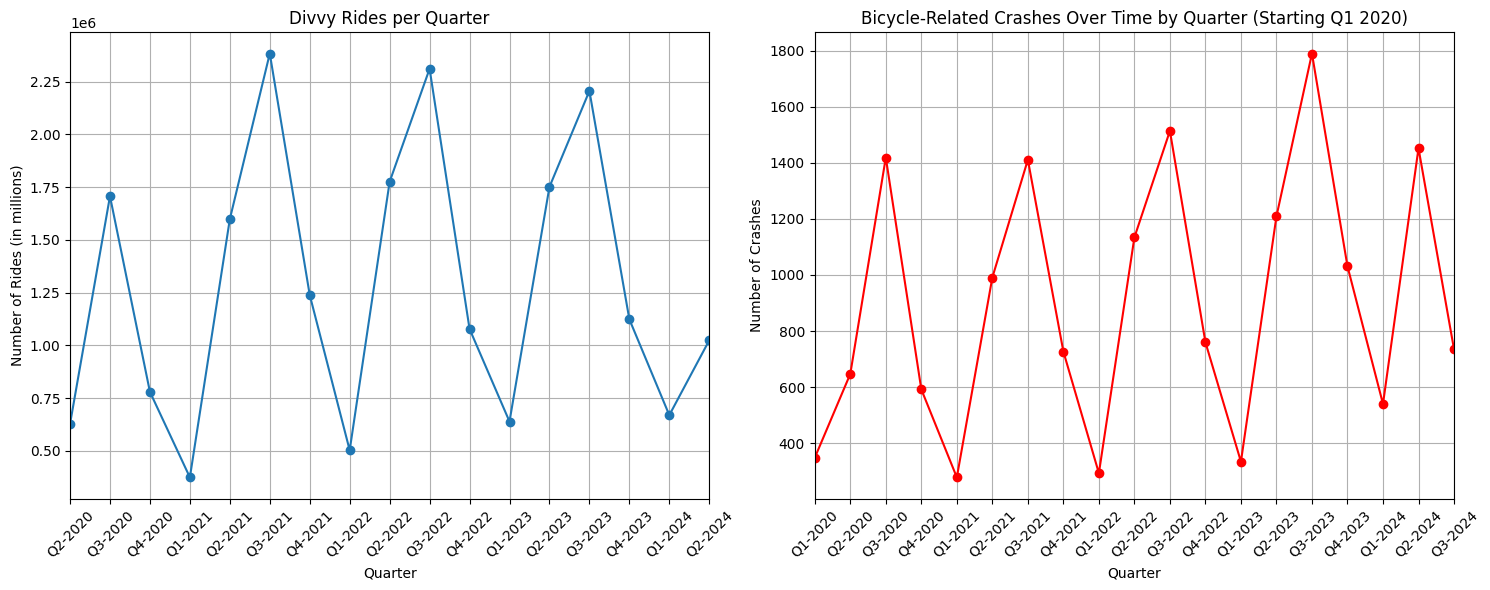

In [18]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Adjusted figure size for better layout

# First plot (Divvy Rides per Quarter) on ax1
quarterly_rides.plot(ax=ax1, marker='o')
ax1.set_xticks(quarterly_rides.index)
ax1.set_xticklabels(
    [f'Q{q.quarter}-{q.year}' for q in quarterly_rides.index],
    rotation=45
)
ax1.set_title('Divvy Rides per Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Number of Rides (in millions)')
ax1.grid(True)

# Second plot (Bicycle-Related Crashes) on ax2
crash_counts_by_quarter.plot(ax=ax2, marker='o',color= 'r')
ax2.set_xticks(crash_counts_by_quarter.index)
ax2.set_xticklabels(
    [f'Q{q.quarter}-{q.year}' for q in crash_counts_by_quarter.index],
    rotation=45
)
ax2.set_title('Bicycle-Related Crashes Over Time by Quarter (Starting Q1 2020)')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Number of Crashes')
ax2.grid(True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()


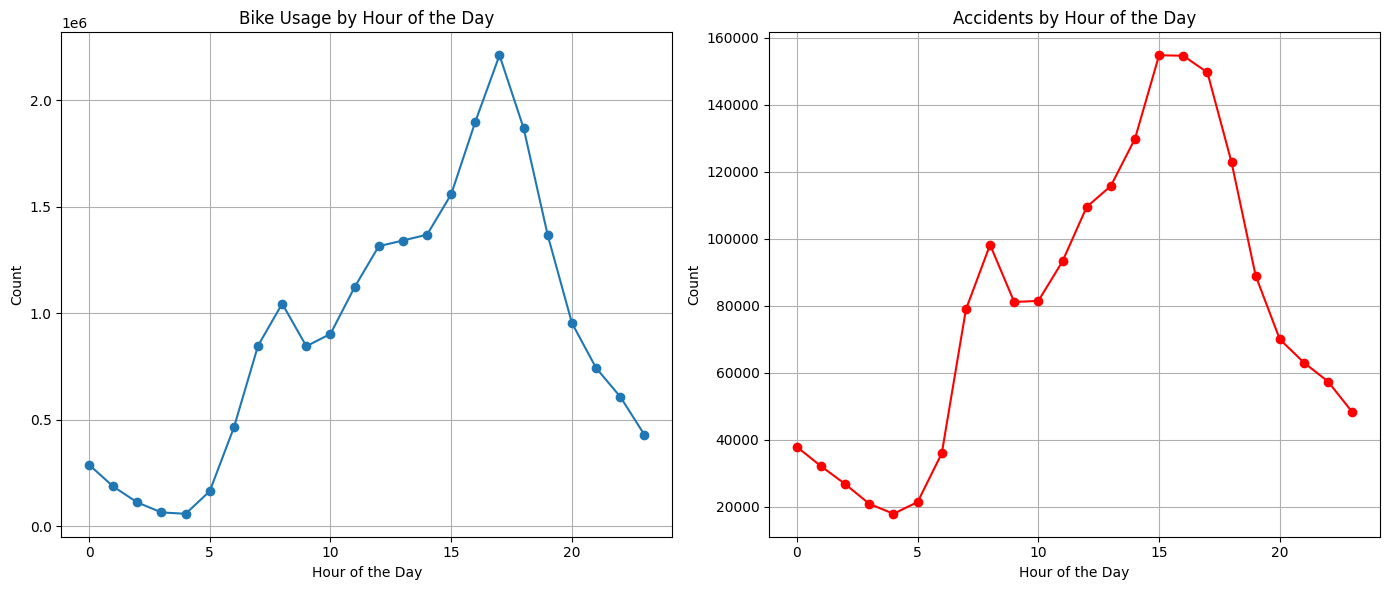

In [9]:
# Are there specific times of day or days of the week where the increase in Divvy bike usage correlates with a higher number of bike accidents or vehicular crashes? 

#Parsing the divvy data to get time data
divvy_trip_history["started_at"] = pd.to_datetime(divvy_trip_history["started_at"], errors='coerce')
divvy_trip_history["ended_at"] = pd.to_datetime(divvy_trip_history["ended_at"], errors='coerce')

#Extracting relevant time of day and day of week info for divvy data
divvy_trip_history['hour'] = divvy_trip_history["started_at"].dt.hour
divvy_trip_history['day_of_week'] = divvy_trip_history["started_at"].dt.day_name()

#Aggregating the usage to determine the size 
usage_by_hour = divvy_trip_history.groupby('hour').size()
usage_by_day = divvy_trip_history.groupby('day_of_week').size()



#Parsing the accident data to get time data
crash_people["date_time"] = pd.to_datetime(crash_people["CRASH_DATE"], format='%m/%d/%Y %I:%M:%S %p')

#Extracting relevant time of day and day of week info for accident data
crash_people['hour'] = crash_people['date_time'].dt.hour
crash_people['day_of_week'] = crash_people['date_time'].dt.day_name()

#Aggregating the usage to determine the size 

accidents_by_hour = crash_people.groupby('hour').size()
accidents_by_day = crash_people.groupby('day_of_week').size()



# Plotting bike usage and accidents by hour
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(usage_by_hour.index, usage_by_hour.values, marker='o', label='Bike Usage')
plt.title('Bike Usage by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accidents_by_hour.index, accidents_by_hour.values, marker='o', color='r', label='Accidents')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

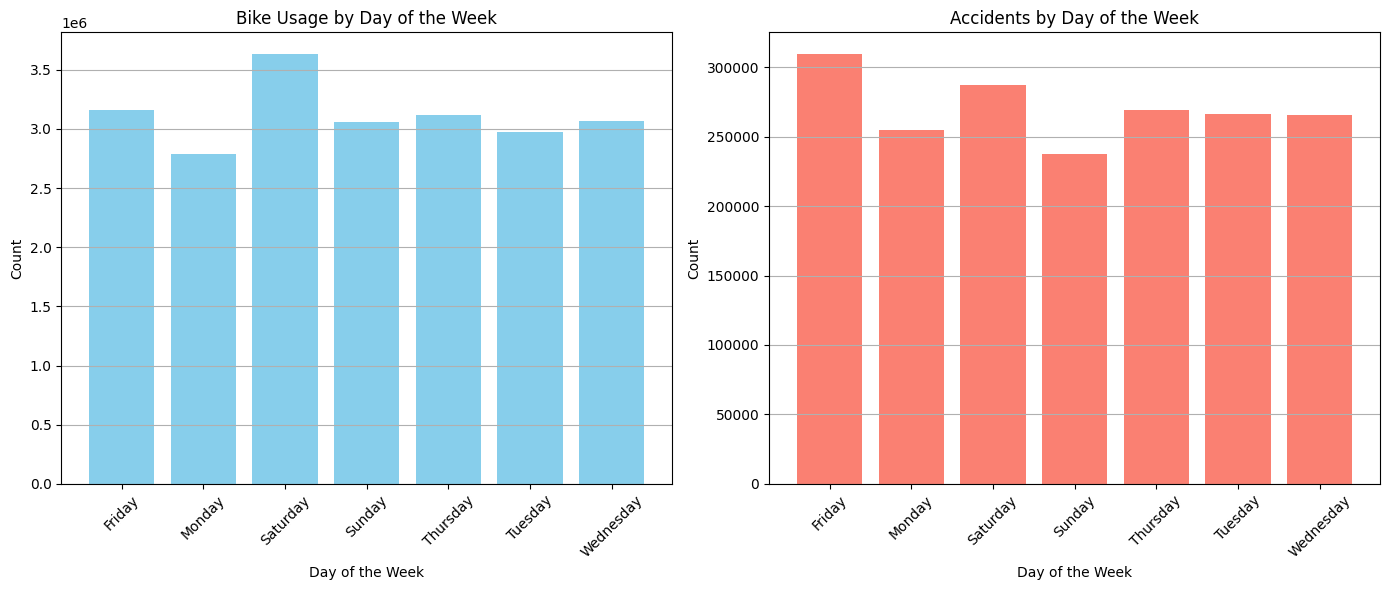

In [10]:
# Plotting bike usage and accidents by day of the week
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(usage_by_day.index, usage_by_day.values, color='skyblue')
plt.title('Bike Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
plt.bar(accidents_by_day.index, accidents_by_day.values, color='salmon')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()